<h1>Rock, Paper, Scissors Image Classifier</h1>

https://github.com/dionisiusdh

This project implemented Convolutional Neural Network with TensorFlow and Keras library to classify an image of rock, paper, or scissors hand gesture

**Importing Packages and Module**


In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Importing Datasets & Extracting**

In [116]:
"""
You can get the datasets here: https://github.com/DrGFreeman/rps-cv
"""
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-29 12:40:08--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.54MB/s    in 62s     

2020-05-29 12:41:11 (4.95 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# Unzipping filees
import zipfile,os
import shutil

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Deleting redundant data
shutil.rmtree('/tmp/rockpaperscissors/rps-cv-images')

# Create a validation directory
os.mkdir('/tmp/val')

base_dir = '/tmp/'
train_dir = os.path.join(base_dir, 'rockpaperscissors')
validation_dir = os.path.join(base_dir, 'val')

In [119]:
# Sample from the data
os.listdir('/tmp/rockpaperscissors/rock')[:5]

['c1rdxANL8E7yG3ZI.png',
 'gutk3kRhu9AfjYWQ.png',
 'd5fTHW3xnYsDhax5.png',
 'aa9v011U1AB9hK5v.png',
 'FVTXzNJQnU231QXO.png']

In [0]:
# Making a training directory for 'rock', 'paper', and 'scissors'
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

# Making a validation directory for 'rock', 'paper', and 'scissors'
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

**Picture Processing & Augmentation with ImageDataGenerator**

In [0]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2, # Memisahkan 20% data menjadi data validasi
                    )

In [170]:
train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical', # Kelas objek >2
        subset='training'
        )

validation_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical', # Kelas objek >2
        subset='validation'
        )

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


**CNN Modeling and Training**

In [0]:
model = tf.keras.models.Sequential([
      # 1st layer
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      # 2nd layer
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # 3rd layer
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # 4th layer
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # Flattening process
      tf.keras.layers.Flatten(),
      # Dropout regularization to prevent overfitting
      tf.keras.layers.Dropout(0.5),
      # 5th layer (Hidden layer)
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')                   
])

In [0]:
# Compiling model
model.compile(
    loss = 'categorical_crossentropy', 
    optimizer='rmsprop', 
    metrics=['accuracy'])

In [173]:
# CNN Training
result = model.fit(
            train_generator,
            steps_per_epoch=25,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=3,
            verbose=1)

Epoch 1/30
25/25 [==============================] - 11s 451ms/step - loss: 1.3758 - accuracy: 0.4280 - val_loss: 1.4591 - val_accuracy: 0.4000
Epoch 2/30
25/25 [==============================] - 11s 451ms/step - loss: 1.0763 - accuracy: 0.4920 - val_loss: 0.9277 - val_accuracy: 0.8333
Epoch 3/30
25/25 [==============================] - 11s 438ms/step - loss: 0.8954 - accuracy: 0.6390 - val_loss: 0.8865 - val_accuracy: 0.6000
Epoch 4/30
25/25 [==============================] - 11s 440ms/step - loss: 0.7948 - accuracy: 0.6760 - val_loss: 0.4607 - val_accuracy: 0.8333
Epoch 5/30
25/25 [==============================] - 11s 441ms/step - loss: 0.5794 - accuracy: 0.7960 - val_loss: 0.4679 - val_accuracy: 0.8667
Epoch 6/30
25/25 [==============================] - 11s 445ms/step - loss: 0.4275 - accuracy: 0.8360 - val_loss: 0.2034 - val_accuracy: 0.9333
Epoch 7/30
25/25 [==============================] - 11s 443ms/step - loss: 0.4398 - accuracy: 0.8640 - val_loss: 0.1928 - val_accuracy: 0.9333

**Model evaluation based on Accuracy & Val_Accuracy**

In [0]:
import matplotlib.pyplot as plt

# Getting the accuracy and val_accuracy from result's history
accuracy = result.history['accuracy']
val_accuracy = result.history['val_accuracy']

epoch = range(len(result.history['accuracy']))

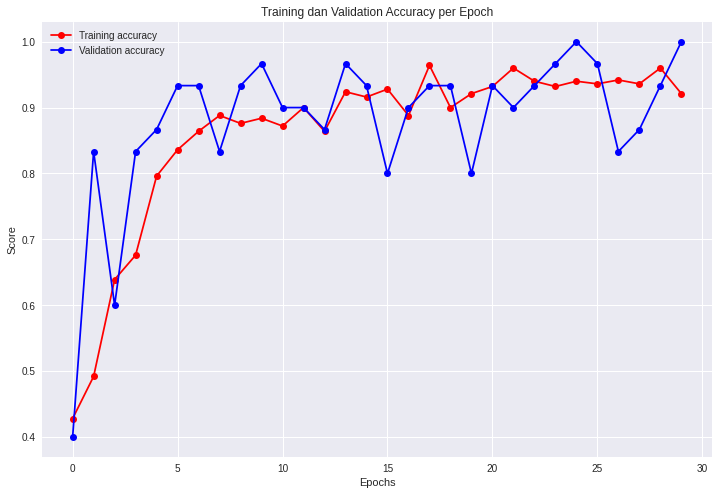

In [181]:
# Data plotting
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(epoch, accuracy, color='red', label='Training accuracy', marker='o')
ax.plot(epoch, val_accuracy, color='blue', label='Validation accuracy', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Score')

plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.show()

#### Maximum training accuracy:  0.964
#### Maximum validation accuracy: 1.0